# Personal Loan Prediction Model Implementation

In [ ]:
# import libraries required for model implementation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score

In [129]:
df = pd.read_excel('C:\\Loan_data.xlsx','Data')

In [130]:
df.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]

In [131]:
df[['ID','ZIP Code']] = df[['ID','ZIPCode']].astype('str')

In [132]:
#This code is to replace negative values in experience

#Take age groups with negatives in a list

grp = df[df['Experience'] < 0]['Age'].unique().tolist()

# Take indexes of all negative experience values

indexes = df[df['Experience'] < 0].index.tolist()

# A small code which uses both lists to replace negatives with means

for i in indexes:
    for x in grp:
        df.loc[i,'Experience'] = df[(df.Age == x) & (df.Experience > 0)].Experience.mean()

# Splitting data as Train and Test

In [176]:
fc = ['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard']

X = df[fc]
y = df.PersonalLoan

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model_f1_score=[]
model_accuracy_score=[]

# DECISION TREE

In [177]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9813333333333333


In [178]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1351
           1       0.92      0.89      0.90       149

    accuracy                           0.98      1500
   macro avg       0.95      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500



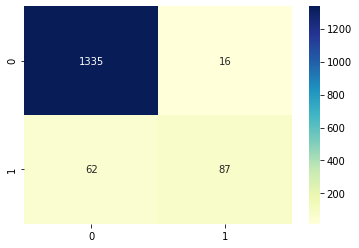

In [208]:
sns.heatmap(confusion_matrix(y_test,y_pred.round()),annot=True,fmt='',cmap='YlGnBu')

# RANDOM FOREST

In [180]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [181]:
print(classification_report(y_test,y_pred.round()))
print(accuracy_score(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1351
           1       0.93      0.84      0.88       149

    accuracy                           0.98      1500
   macro avg       0.96      0.92      0.94      1500
weighted avg       0.98      0.98      0.98      1500

0.978


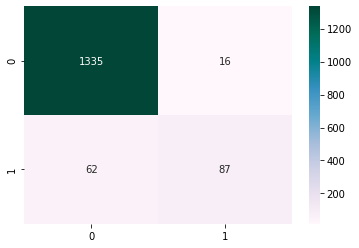

In [207]:
sns.heatmap(confusion_matrix(y_test,y_pred.round()),annot=True,fmt='',cmap='PuBuGn')

# KNN CLASSIFIER

In [183]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1351
           1       0.92      0.47      0.62       149

    accuracy                           0.94      1500
   macro avg       0.93      0.73      0.80      1500
weighted avg       0.94      0.94      0.93      1500



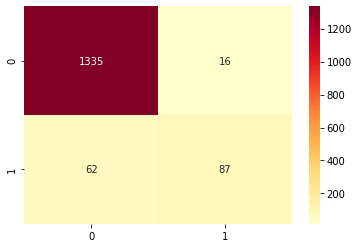

In [206]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='',cmap='YlOrRd')

# SVM

In [185]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

In [186]:
svc = SVC(kernel='linear')  
  
# fitting x samples and y classes  
svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)

svc_score=f1_score(y_test,y_pred)
model_f1_score.append(svc_score)
svc_score

svc_accuracy=accuracy_score(y_test,y_pred)
model_accuracy_score.append(svc_accuracy)
svc_accuracy

0.9473333333333334

In [187]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.89      0.54      0.67       149

    accuracy                           0.95      1500
   macro avg       0.92      0.76      0.82      1500
weighted avg       0.94      0.95      0.94      1500



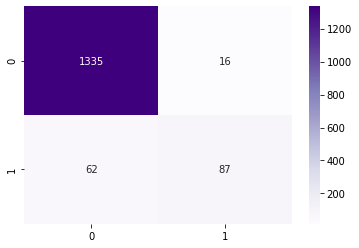

In [205]:
sns.heatmap(confusion_matrix(y_test,y_pred.round()),annot=True,fmt='',cmap='Purples')

# K-Means Clustering

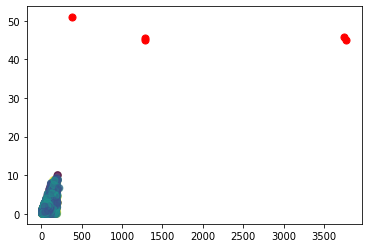

In [216]:
from pandas import DataFrame
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


dff = DataFrame(df,columns=['Income','CCAvg'])
  
kmeans = KMeans(n_clusters=5).fit(df)
centroids = kmeans.cluster_centers_
#print(centroids)

plt.scatter(dff['Income'], dff['CCAvg'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

# LOGISTIC REGRESSION

In [190]:
from sklearn.linear_model import LogisticRegression
new = []

new.append('LogisticRegression')
lr=LogisticRegression()

In [197]:
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)

lr_score=f1_score(y_test,y_pred)
model_f1_score.append(lr_score)
lr_score

lr_accuracy=accuracy_score(y_test,y_pred)
model_accuracy_score.append(lr_accuracy)
lr_accuracy

0.948

In [199]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.84      0.58      0.69       149

    accuracy                           0.95      1500
   macro avg       0.90      0.79      0.83      1500
weighted avg       0.94      0.95      0.94      1500



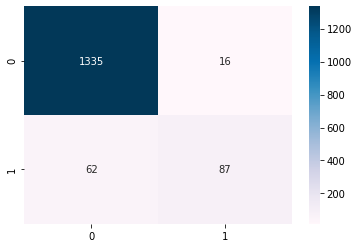

In [204]:
sns.heatmap(confusion_matrix(y_test,y_pred.round()),annot=True,fmt='',cmap='PuBu')